# DT Classification

In [81]:
# CONTEXT
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [82]:
# IMPORTING THE UTILS FOR MANIPULATE THE DATASET
import sys
sys.path.append('../Classifiers/')
from dataset_utils import *

In [83]:
from sklearn.model_selection import train_test_split,cross_val_score
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.tree import DecisionTreeClassifier

Import the dataset and generate the one we'll use for the classification with the fake and the real users

In [84]:
# IMPORT THE ORIGINAL DATASET
df_real = pd.read_csv('../../data/balanced_real_data.csv')
df_fake = pd.read_csv('../../data/balanced_fake_data.csv')
dataset=pd.concat([df_real,df_fake],ignore_index=True)
dataset=fix_private_entries(dataset)


In [85]:
dataset.head(10)


profile_pic  biography  follows_count  followed_by_count     ff_ratio  \
0         True         45           2979                846     0.283988   
1         True        131            966               5172     5.354037   
2         True        128           1662               1475     0.887485   
3         True          0            236                111     0.470339   
4         True         16            386             967516  2506.518135   
5         True        103           2544            1652183   649.443003   
6         True        150            410              70481   171.904878   
7         True         15           1269               1311     1.033097   
8         True          0            755               2959     3.919205   
9         True        116            336            1693459  5040.056548   

   media_count  is_private  is_verified  is_business_account  \
0          278       False        False                False   
1          150       False        False                 True   
2          403       False        False                 True   
3           43        True        False                False   
4           34       False         True                 True   
5         9670       False         True                False   
6         2459       False        False                 True   
7           24       False        False                 True   
8          225       False        False                 True   
9         4214       False         True                 True   

   is_joined_recently  ...  std_comments  var_comments  skw_comments  \
0               False  ...      4.964205  2.464333e+01      1.759163   
1               False  ...      0.472582  2.233333e-01      2.951336   
2               False  ...      5.961543  3.554000e+01      1.546427   
3               False  ...           NaN           NaN           NaN   
4               False  ...   1180.090381  1.392613e+06      0.319856   
5               False  ...     49.513466  2.451583e+03      1.172048   
6               False  ...     82.691253  6.837843e+03      0.989691   
7               False  ...      1.742479  3.036232e+00      0.746906   
8               False  ...      4.325506  1.871000e+01      1.069453   
9               False  ...    153.991472  2.371337e+04      2.851830   

   mean_time_between_posts  max_time_between_posts  min_time_between_posts  \
0             1.688451e+06               7930005.0                 75731.0   
1             1.978352e+05                851011.0                  3855.0   
2             2.950338e+05               1128895.0                  9212.0   
3                      NaN                     NaN                     NaN   
4             2.418942e+06              12726352.0                    36.0   
5             7.948950e+04                287585.0                  5895.0   
6             3.742878e+05                827086.0                 86472.0   
7             4.613034e+06              24784763.0                433680.0   
8             1.003002e+05                413788.0                 16256.0   
9             5.910004e+04                278030.0                  1313.0   

   std_time_between_posts  var_time_between_posts  skw_time_between_posts  \
0            1.964306e+06            3.858496e+12                1.947676   
1            2.222041e+05            4.937467e+10                1.785389   
2            2.417832e+05            5.845911e+10                1.726161   
3                     NaN                     NaN                     NaN   
4            2.814164e+06            7.919517e+12                2.273966   
5            7.382074e+04            5.449502e+09                1.315021   
6            2.019481e+05            4.078303e+10                0.286078   
7            5.338513e+06            2.849972e+13                2.462336   
8            8.768568e+04            7.688778e+09                2.289149   
9            7.192136e+04            5.

In [86]:
# TAKE THE TRAINSET AND THE TARGET FROM DATASET
trainset=get_trainset(dataset)
targets=get_target_dataset(dataset)

# Classification without the Statistics from the Media of the Users 

In [88]:
# DELETING THE STATISTICS OF THE USERS CONTENTS
trainset_without_stats=drop_stats(trainset)

print(trainset_without_stats)

       profile_pic  biography  follows_count  followed_by_count     ff_ratio  \
0             True         45           2979                846     0.283988   
1             True        131            966               5172     5.354037   
2             True        128           1662               1475     0.887485   
3             True          0            236                111     0.470339   
4             True         16            386             967516  2506.518135   
...            ...        ...            ...                ...          ...   
15303         True         31           1440                504     0.350000   
15304         True          3           3040                 43     0.014145   
15305         True          0           6638                 86     0.012956   
15306         True         66           4501              10424     2.315930   
15307         True         45            695                 18     0.025899   

       media_count  is_private  is_veri

In [89]:
# TRAINING THE DECISION TREE WITHOUT STATISTICS OF THE USERS CONTENTS
x_train, x_test, y_train, y_test = train_test_split(trainset_without_stats, targets, test_size = 0.2, random_state = 12345)
dtc = DecisionTreeClassifier(random_state=0,max_depth=6)
dtc_fit=dtc.fit(x_train, y_train)
predictions = dtc.predict(x_test)


# Confusion Matrix 

In [90]:
print(confusion_matrix(y_test, predictions))


[[1436  125]
 [ 146 1355]]


# Classification Report

In [91]:
print(classification_report(y_test, predictions))


              precision    recall  f1-score   support

       False       0.91      0.92      0.91      1561
        True       0.92      0.90      0.91      1501

    accuracy                           0.91      3062
   macro avg       0.91      0.91      0.91      3062
weighted avg       0.91      0.91      0.91      3062



## Saving model with the Pickle Module

In [92]:
import pickle

# save the model to disk
filename = 'DT_without_stats.sav'
pickle.dump(dtc, open(filename, 'wb'))

In [95]:
input=x_test.iloc[1,:].values.reshape(1,-1)
print(input)

# load the model from disk
loaded_model = pickle.load(open('DT_without_stats.sav', 'rb'))
loaded_model.predict(input)




[[True 120 925 52281 56.52 1473 False False False False 8]]


array([ True])

# Tuning the Decision Tree by 10-Fold CrossValidation 

Using the crossvalidation with 10 Fold we can tune the Decision Tree: in particular is possible to choose the right depth of the tree for obtain the best result and avoid the overfitting problem

In [12]:
depth = []

for i in range(3,20):
    dtc_cross = DecisionTreeClassifier(max_depth=i)
    # Perform 10-fold cross validation 
    scores = cross_val_score(estimator=dtc_cross, X=trainset_without_stats, y=targets, cv=10, n_jobs=4)
    depth.append((i,scores.mean()))

print("Depth of DT\tCross Validation Score (Mean)")

for score in depth:
    print(str(score[0])+"\t\t"+str(score[1]))


Depth of DT	Cross Validation Score (Mean)
3		0.8865952490656838
4		0.8943021211966075
5		0.9023373265755389
6		0.9110905476202665
7		0.910371849348965
8		0.9098496561374768
9		0.9090650011092339
10		0.9062571033635386
11		0.9021403948872848
12		0.8991358214303998
13		0.8968488370108705
14		0.8944971757197223
15		0.8911681939964845
16		0.888489479342651
17		0.8888162767282719
18		0.8870525947541766
19		0.8869872352770525


# Result Decision Tree

In [39]:
from sklearn import tree
import pydotplus
from IPython.display import Image

features=list(trainset_without_stats.columns)


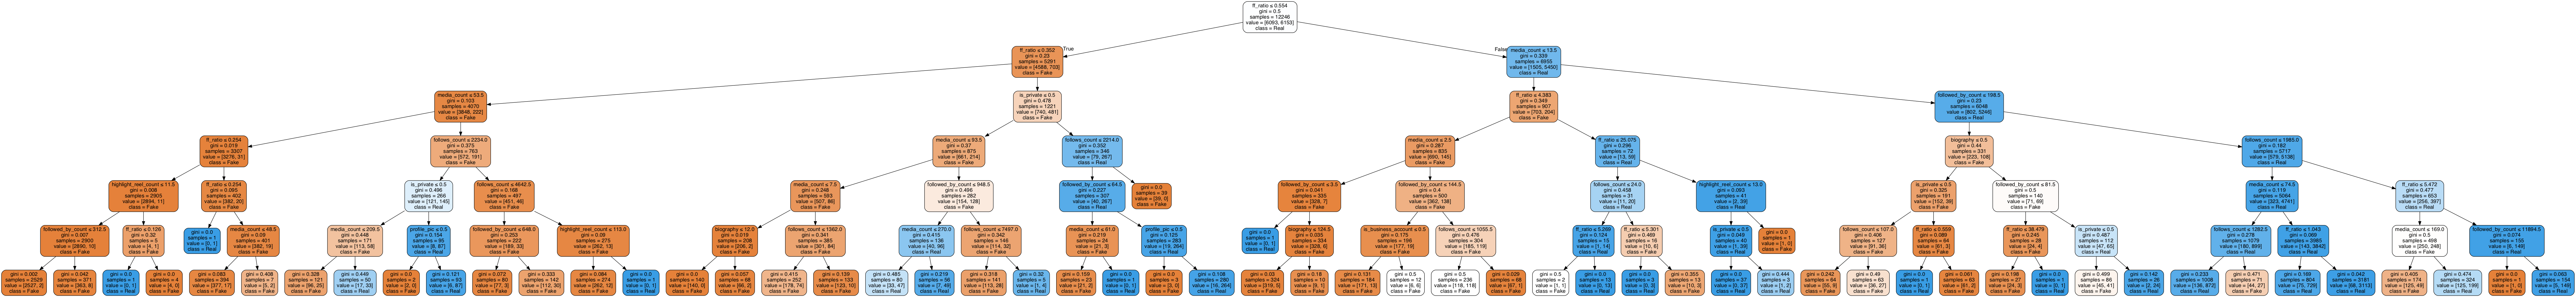

In [40]:
# Getting the columns names for render the tree
features=list(trainset_without_stats.columns)

dot_data = tree.export_graphviz(dtc, out_file=None,
                         feature_names=features,class_names=['Fake','Real'],
                         filled=True, rounded=True,  
                         special_characters=True)  
graph = pydotplus.graph_from_dot_data(dot_data)  
Image(graph.create_png())  

# Classification with only Public Profile (with Media Stats)

In [41]:
# CLASSIFICATION OF ONLY PUBLIC PROFILES
dataset_publics=drop_NaN_entries(dataset)
trainset_publics=get_trainset(dataset_publics)
targets_publics=get_target_dataset(dataset_publics)

In [42]:
x_train, x_test, y_train, y_test = train_test_split(trainset_publics, targets_publics, test_size = 0.2, random_state = 12345)
dtc = DecisionTreeClassifier(random_state=0,max_depth=7)
dtc.fit(x_train, y_train)
predictions = dtc.predict(x_test)

# Confusion Matrix 

In [43]:
print(confusion_matrix(y_test, predictions))

[[1025  128]
 [  78 1061]]


# Classification Report

In [44]:
print(classification_report(y_test, predictions))

              precision    recall  f1-score   support

       False       0.93      0.89      0.91      1153
        True       0.89      0.93      0.91      1139

    accuracy                           0.91      2292
   macro avg       0.91      0.91      0.91      2292
weighted avg       0.91      0.91      0.91      2292



# Tuning the Decision Tree by 10-Fold CrossValidation 

In [19]:
depth = []

for i in range(3,20):
    dtc_cross = DecisionTreeClassifier(max_depth=i)
    # Perform 10-fold cross validation 
    scores = cross_val_score(estimator=dtc_cross, X=trainset_publics, y=targets_publics, cv=10, n_jobs=4)
    depth.append((i,scores.mean()))

print("Depth of DT\tCross Validation Score (Mean)")

for score in depth:
    print(str(score[0])+"\t\t"+str(score[1]))


Depth of DT	Cross Validation Score (Mean)
3		0.8802565819031452
4		0.8953556947957235
5		0.9070518924311397
6		0.910106222414578
7		0.910019343294976
8		0.9149062872279844
9		0.9128982401546931
10		0.9079237308166904
11		0.9063540401163943
12		0.90617898724355
13		0.906440462509712
14		0.9048702388734942
15		0.9048690201837205
16		0.9067020908595749
17		0.9060910414547937
18		0.9039974100284269
19		0.906265485846505


# Result Decision Tree

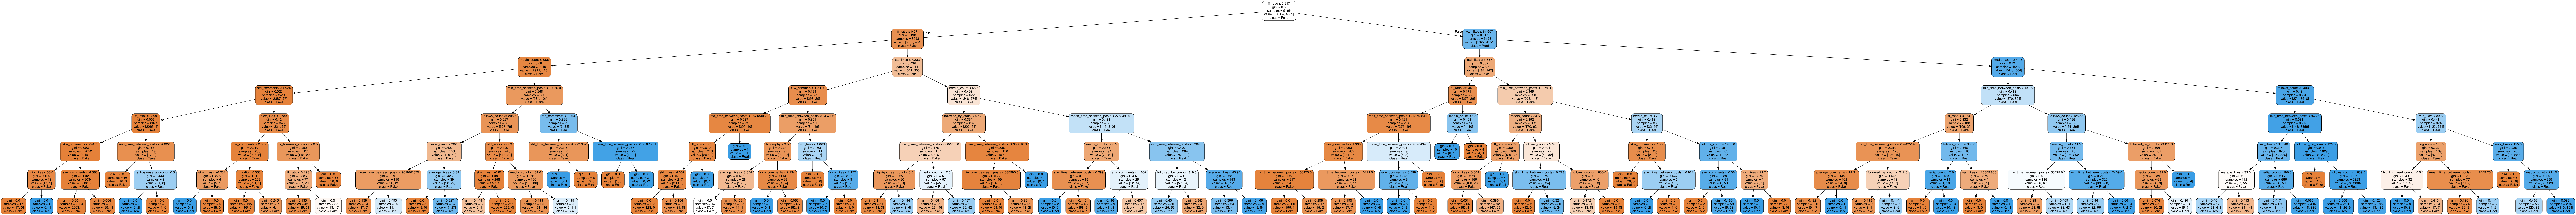

In [45]:
# Getting the columns names for render the tree
features=list(trainset_publics.columns)

dot_data = tree.export_graphviz(dtc, out_file=None,
                         feature_names=features,class_names=['Fake','Real'],
                         filled=True, rounded=True,  
                         special_characters=True)  
graph = pydotplus.graph_from_dot_data(dot_data)  
Image(graph.create_png())  

# Classification with NaN Values replaced with Median

In [46]:
# CLASSIFICATION WITH NaN VALUES REPLACED WITH STATISTICS
dataset_median=fill_NaN_median(dataset)
trainset_median=get_trainset(dataset_median)
targets_median=get_target_dataset(dataset_median)
print(dataset_median.shape)

(15308, 30)


In [47]:
x_train, x_test, y_train, y_test = train_test_split(trainset_median, targets_median, test_size = 0.2, random_state = 12345)
dtc = DecisionTreeClassifier(random_state=0,max_depth=5)
dtc.fit(x_train, y_train)
predictions = dtc.predict(x_test)

# Confusion Matrix 

In [48]:
print(confusion_matrix(y_test, predictions))

[[1396  165]
 [  91 1410]]


# Classification Report

In [49]:
print(classification_report(y_test, predictions))

              precision    recall  f1-score   support

       False       0.94      0.89      0.92      1561
        True       0.90      0.94      0.92      1501

    accuracy                           0.92      3062
   macro avg       0.92      0.92      0.92      3062
weighted avg       0.92      0.92      0.92      3062



# Tuning the Decision Tree by 10-Fold CrossValidation 

In [20]:
depth = []

for i in range(3,20):
    dtc_cross = DecisionTreeClassifier(max_depth=i)
    # Perform 10-fold cross validation 
    scores = cross_val_score(estimator=dtc_cross, X=trainset_median, y=targets_median, cv=10, n_jobs=4)
    depth.append((i,scores.mean()))

print("Depth of DT\tCross Validation Score (Mean)")

for score in depth:
    print(str(score[0])+"\t\t"+str(score[1]))

KeyboardInterrupt: 

# Result Decision Tree

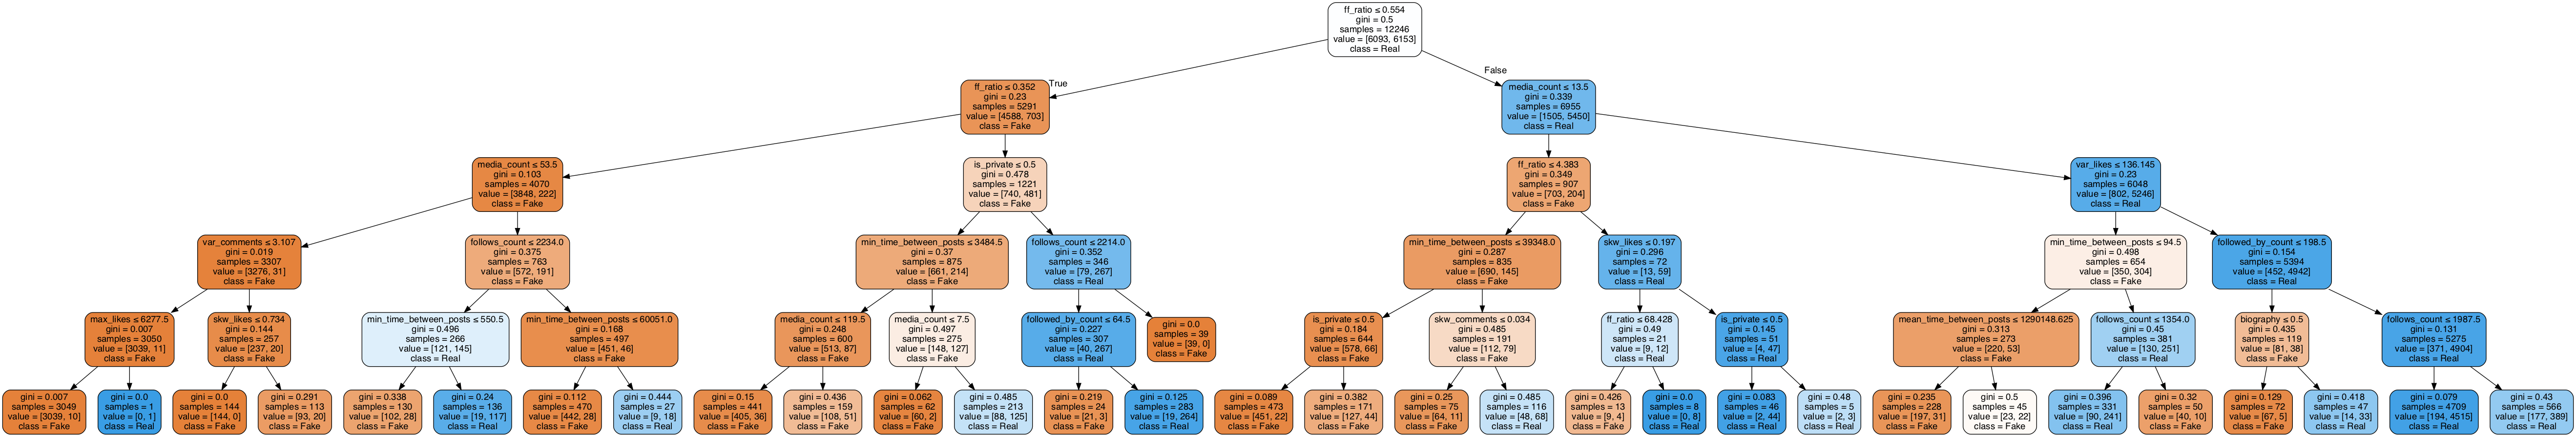

In [50]:
# Getting the columns names for render the tree
features=list(trainset_median.columns)

dot_data = tree.export_graphviz(dtc, out_file=None,
                         feature_names=features,class_names=['Fake','Real'],
                         filled=True, rounded=True,  
                         special_characters=True)  
graph = pydotplus.graph_from_dot_data(dot_data)  
Image(graph.create_png()) 

In [51]:
input=x_test.iloc[1,:].values.reshape(1,-1)
print(input)




[[True 120 925 52281 56.52 1473 False False False False 8 2052.92 3447.0
  766.0 662.2851802660241 438621.66 0.25603239508949044 39.84 145.0 8.0
  26.017109754928583 676.89 2.727020177141652 327084.41666666674
  1225285.0 63389.0 316638.4745828697 100259923586.16666
  1.6504341195281584]]


In [52]:
dtc.predict(input)


array([ True])